In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 

url = cdc_diabetes_health_indicators['metadata']['data_url']
print(url)

df = pd.read_csv(url)

# Separate the classes (assuming 'target' is your binary response column)
class_0 = df[df['Diabetes_binary'] == 0]
class_1 = df[df['Diabetes_binary'] == 1]

# Determine how many samples to take from each class
n_samples_per_class = 5000 // 2

# Randomly sample from each class
sampled_class_0 = class_0.sample(n=n_samples_per_class, random_state=42)
sampled_class_1 = class_1.sample(n=n_samples_per_class, random_state=42)

# Combine the samples
sampled_df = pd.concat([sampled_class_0, sampled_class_1])

# Shuffle the resulting DataFrame
df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)
df

https://archive.ics.uci.edu/static/public/891/data.csv


,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,199346,0,1,1,0,32,1,0,0,1,...,1,0,5,10,10,1,1,8,4,2
1,28980,1,0,1,1,30,0,0,0,0,...,1,0,1,0,0,0,0,10,4,3
2,31056,1,0,0,1,30,1,0,0,1,...,1,0,3,0,0,0,0,7,5,6
3,90212,0,1,1,1,33,0,0,1,1,...,1,0,3,5,5,1,0,10,6,8
4,141466,0,0,0,1,27,1,0,0,0,...,1,0,2,0,7,0,1,6,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,123223,1,1,1,1,32,1,0,0,1,...,1,0,4,0,30,0,1,10,3,3
4996,70134,0,0,0,1,20,0,0,0,0,...,1,0,2,2,2,1,0,7,5,3
4997,173533,1,1,1,1,28,1,0,0,1,...,1,1,3,2,0,0,0,13,5,4
4998,169867,1,0,1,1,33,0,0,0,1,...,1,0,4,7,10,1,1,8,5,7


# Data Preprocessing (2.1)

In [2]:
# Check for missing values
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  # Display only columns with missing data

#dropping the data because only 6 rows missing so no need to replace
df = df.dropna()

Series([], dtype: int64)


In [3]:
print(df['Diabetes_binary'].value_counts())

0    2500
1    2500
Name: Diabetes_binary, dtype: int64


In [4]:
# Check data types and observing if I need to convert anything
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   ID                    5000 non-null   int64
 1   Diabetes_binary       5000 non-null   int64
 2   HighBP                5000 non-null   int64
 3   HighChol              5000 non-null   int64
 4   CholCheck             5000 non-null   int64
 5   BMI                   5000 non-null   int64
 6   Smoker                5000 non-null   int64
 7   Stroke                5000 non-null   int64
 8   HeartDiseaseorAttack  5000 non-null   int64
 9   PhysActivity          5000 non-null   int64
 10  Fruits                5000 non-null   int64
 11  Veggies               5000 non-null   int64
 12  HvyAlcoholConsump     5000 non-null   int64
 13  AnyHealthcare         5000 non-null   int64
 14  NoDocbcCost           5000 non-null   int64
 15  GenHlth               5000 non-null   int64
 16  MentHl

In [5]:
#understanding the description of the data
#observing IQR , mean , min, etc.
df.describe()

,ID,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,126168.031000,0.50000,0.557600,0.529400,0.977800,29.94800,0.472400,0.061800,0.153000,0.707200,...,0.953200,0.091000,2.833800,3.735400,5.846800,0.253400,0.454600,8.609800,4.923000,5.65920
std,73190.134424,0.50005,0.496721,0.499185,0.147348,7.41406,0.499288,0.240816,0.360024,0.455093,...,0.211231,0.287638,1.111407,8.091334,10.123054,0.435001,0.497984,2.830538,1.022976,2.17991
min,23.000000,0.00000,0.000000,0.000000,0.000000,14.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000
25%,62335.000000,0.00000,0.000000,0.000000,1.000000,25.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.00000
50%,124980.500000,0.50000,1.000000,1.000000,1.000000,29.00000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.00000
75%,190151.500000,1.00000,1.000000,1.000000,1.000000,33.00000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.00000
max,253603.000000,1.00000,1.000000,1.000000,1.000000,95.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.00000


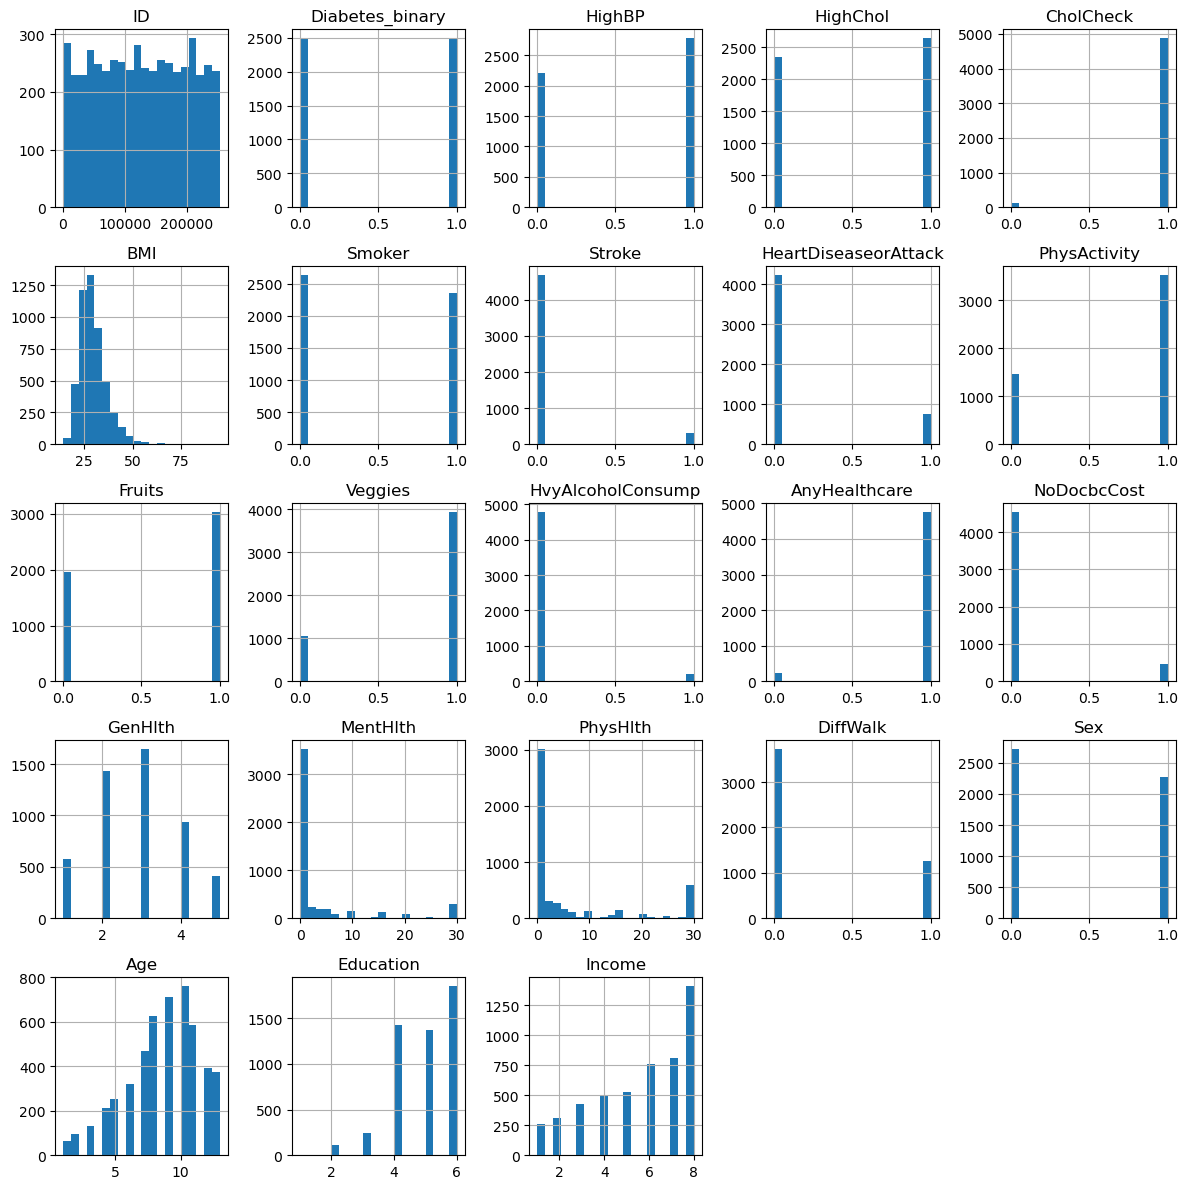

In [6]:
# Check if attributes are normally distributed by visualizing them
df.hist(figsize=(12, 12), bins=20)
plt.tight_layout()
plt.show()

In [7]:
# Standardize using StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

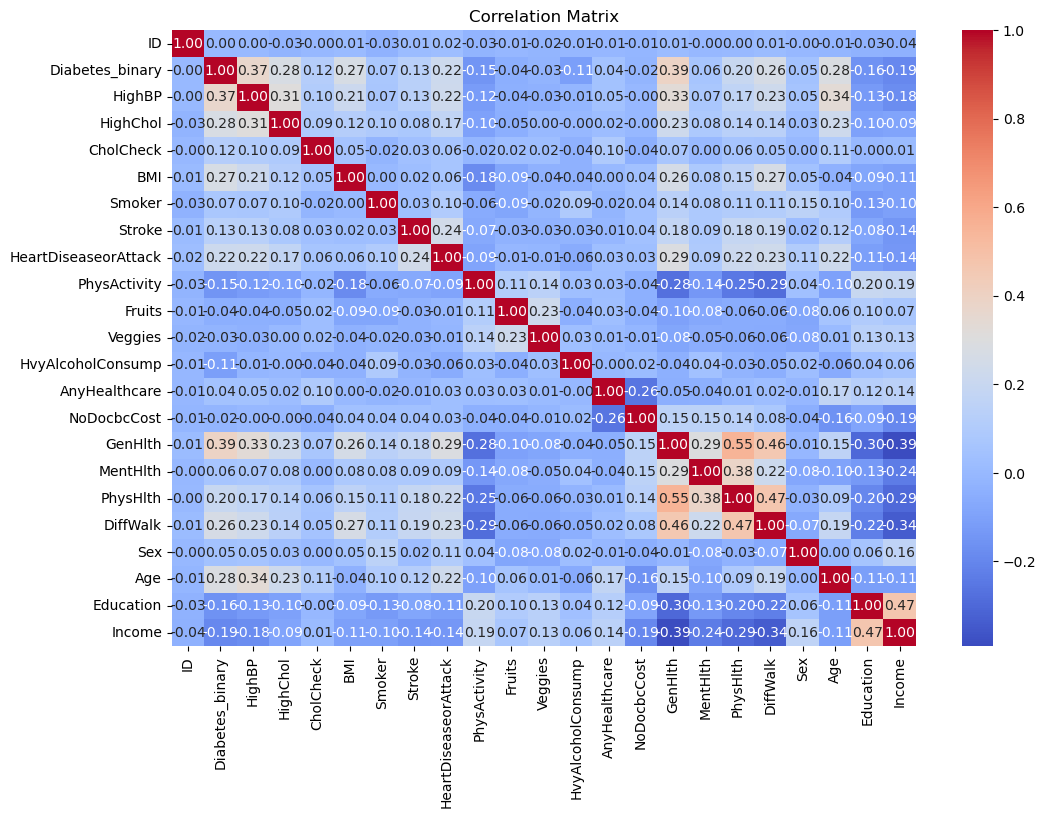

In [8]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [13]:
target_corr = correlation_matrix['Diabetes_binary'].sort_values(ascending=False)
f = target_corr[target_corr.abs() > 0.20].index
print(f)
features= ['GenHlth', 'HighBP', 'Age', 'HighChol', 'BMI',
       'DiffWalk', 'PhysHlth', 'HeartDiseaseorAttack', 'Income']

Index(['Diabetes_binary', 'GenHlth', 'HighBP', 'Age', 'HighChol', 'BMI',
       'DiffWalk', 'HeartDiseaseorAttack'],
      dtype='object')


# 2.2

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


# Split data into features and target (assuming 'target' is your label)
X = df[features]
y = df['Diabetes_binary']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up parameter grid for hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters for Decision Tree: {grid_dt.best_params_}")
y_pred_dt = grid_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

Best parameters for Decision Tree: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       476
           1       0.74      0.73      0.73       524

    accuracy                           0.72      1000
   macro avg       0.72      0.72      0.72      1000
weighted avg       0.72      0.72      0.72      1000



In [16]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up parameter grid
param_grid_rf = {
    'n_estimators': [30, 60, 90],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2,3,4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")
y_pred_rf = grid_rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}
              precision    recall  f1-score   support

           0       0.72      0.71      0.71       476
           1       0.74      0.74      0.74       524

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



In [17]:
# Initialize AdaBoost model
ada = AdaBoostClassifier(algorithm='SAMME')

# Set up parameter grid
param_grid_ada = {
    'n_estimators': [20,40,60,80,100,120,140],
    'learning_rate': [0.01, 0.1, 1]
}

# Perform GridSearchCV for hyperparameter tuning
grid_ada = GridSearchCV(ada, param_grid_ada, cv=5, scoring='accuracy')
grid_ada.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters for AdaBoost: {grid_ada.best_params_}")
y_pred_ada = grid_ada.predict(X_test)
print(classification_report(y_test, y_pred_ada))

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 120}
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       476
           1       0.75      0.75      0.75       524

    accuracy                           0.74      1000
   macro avg       0.74      0.74      0.74      1000
weighted avg       0.74      0.74      0.74      1000



In [ ]:
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Set up parameter grid
param_grid_xgb = {
    'n_estimators': [40,60,80,100,120],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Perform GridSearchCV for hyperparameter tuning
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

# Best parameters and model evaluation
print(f"Best parameters for XGBoost: {grid_xgb.best_params_}")
y_pred_xgb = grid_xgb.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Print accuracy for each model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_ada)}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")